# Sanity Checks
Here we conduct some experiments to evaluate the basic functionality and assumptions of the code. Prior to reviewing
these parts, you should take a look at Manual_Simulation.ipynb.

## Import the Necessary Libs
In the beginning, we import some necessary simulation libraries from the code folder.

In [3]:
import sys, os
sys.path.insert(1, os.path.join(os.pardir, 'src'))

from time_handle import Time

## Run a Normal Simulation
This is the base simulation, with no commands, i.e., no policy situation. First, we initialize the parser and load
population generator and disease properties from the respective json files.

In [4]:
# Import Parser
from json_handle import Parser
parser = Parser('test')

# Load Population Generator from JSON file
population_generator = parser.parse_population_generator()

# Load Disease Properties from JSON file
disease_properties = parser.parse_disease_properties()


INFO - population_generator.py - 1295 - __init__ - 2020-12-04 14:24:25,453 - Population Generator created
INFO - disease_manipulator.py - 61 - __init__ - 2020-12-04 14:24:25,454 - Disease Properties generated


Test some features of population generator, to make sure about JSON files setting.

In [5]:
print('Population size is', population_generator.population_size, '.')
print('There are', len(population_generator.family_pattern_probability_dict), 'family patterns.')
print('Distance function is', population_generator.distance_function.__name__, '.')
print('There are', len(population_generator.community_types), 'and the first one is named', population_generator.community_types[0].name, '.')

Population size is 500 .
There are 4 family patterns.
Distance function is euclidean_distance .
There are 1 and the first one is named School .


Then, simulator settings are parsed, and loaded into the simulator. This also includes the last two steps, so no need
to add population generator and disease properties in the first place.

In [6]:
# Load Simulator from JSON file
simulator = parser.parse_simulator()
simulator.generate_model(is_parallel=False)

INFO - population_generator.py - 1295 - __init__ - 2020-12-04 14:24:28,933 - Population Generator created
INFO - disease_manipulator.py - 61 - __init__ - 2020-12-04 14:24:28,935 - Disease Properties generated
INFO - population_generator.py - 1328 - generate_population - 2020-12-04 14:24:29,151 - Jobs required to generate the model: 1

INFO - time_simulator.py - 195 - generate_model - 2020-12-04 14:24:32,820 - Simulation model generated


Now we load simulator data as well.

In [7]:
# Load Simulator Data from JSON file
end_time, spread_period, initialized_infected_ids, _, observers = parser.parse_simulator_data()

We set the commands to an empty list and run the simulation.

In [8]:
commands = []
simulator.simulate(end_time=end_time,
                    spread_period=spread_period,
                    initialized_infected_ids=initialized_infected_ids,
                    commands=commands,
                    observers=observers)

INFO - time_simulator.py - 336 - simulate - 2020-12-04 14:24:51,863 - Initializing the simulation
INFO - time_simulator.py - 343 - simulate - 2020-12-04 14:24:51,889 - Starting the simulation

INFO - time_simulator.py - 365 - simulate - 2020-12-04 14:25:18,713 - Simulation completed
INFO - utils.py - 303 - show_people_statistics - 2020-12-04 14:25:18,715 - 
+----------------------------+-------+
|           People           | Count |
+============================+=======+
| Population Size            | 500   |
+----------------------------+-------+
| Confirmed (Active + Close) | 277   |
+----------------------------+-------+
| Total Death Cases          | 12    |
+----------------------------+-------+
| Total Recovered            | 488   |
+----------------------------+-------+
| Currently Active Cases     | 90    |
+----------------------------+-------+
INFO - utils.py - 280 - show_simulator_statistics - 2020-12-04 14:25:18,716 - 
+---------------+---------------------+
|   Simulator 

### Check infected people over time

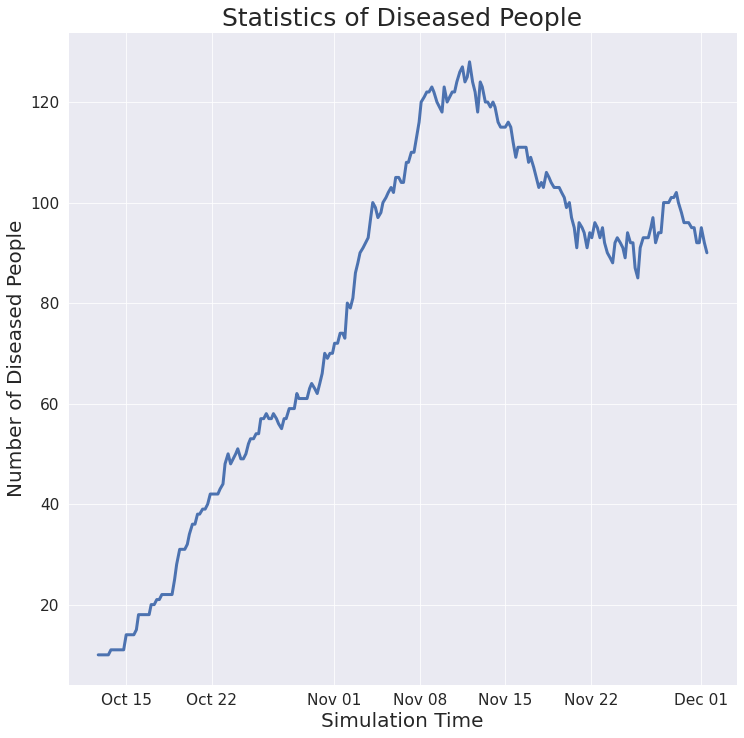

In [10]:
from utils import Health_Condition
observers[0].plot_disease_statistics_during_time(Health_Condition.IS_INFECTED)

## Simulate with a Quarantine Everyone Policy
Now, we add a policy to quarantine all the people after 3 days, and see how the result changes.

In [15]:
# Import Parser
from json_handle import Parser
parser = Parser('test')

# Load Simulator from JSON file
simulator = parser.parse_simulator()
simulator.generate_model()

# Load Simulator Data from JSON file
end_time, spread_period, initialized_infected_ids, _, observers = parser.parse_simulator_data()

# Build a policy
from datetime import timedelta
from commands import Quarantine_Multiple_People
from conditions import Time_Point_Condition

commands = [Quarantine_Multiple_People(condition=Time_Point_Condition(Time(timedelta(days=20))), ids=[i for i in range(500)])]

simulator.simulate(end_time
                    , spread_period
                    , initialized_infected_ids
                    , commands
                    , observers
                    , report_statistics=2)


INFO - population_generator.py - 1295 - __init__ - 2020-12-04 14:27:03,962 - Population Generator created
INFO - disease_manipulator.py - 61 - __init__ - 2020-12-04 14:27:03,968 - Disease Properties generated
INFO - population_generator.py - 1328 - generate_population - 2020-12-04 14:27:04,161 - Jobs required to generate the model: 1

INFO - time_simulator.py - 195 - generate_model - 2020-12-04 14:27:07,969 - Simulation model generated
INFO - time_simulator.py - 336 - simulate - 2020-12-04 14:27:07,971 - Initializing the simulation
INFO - time_simulator.py - 343 - simulate - 2020-12-04 14:27:07,993 - Starting the simulation
INFO - commands.py - 666 - take_action - 2020-12-04 14:27:19,127 - Command executed: Quarantine_Multiple_People

INFO - time_simulator.py - 365 - simulate - 2020-12-04 14:27:28,562 - Simulation completed
INFO - utils.py - 303 - show_people_statistics - 2020-12-04 14:27:28,563 - 
+----------------------------+-------+
|           People           | Count |
+=========

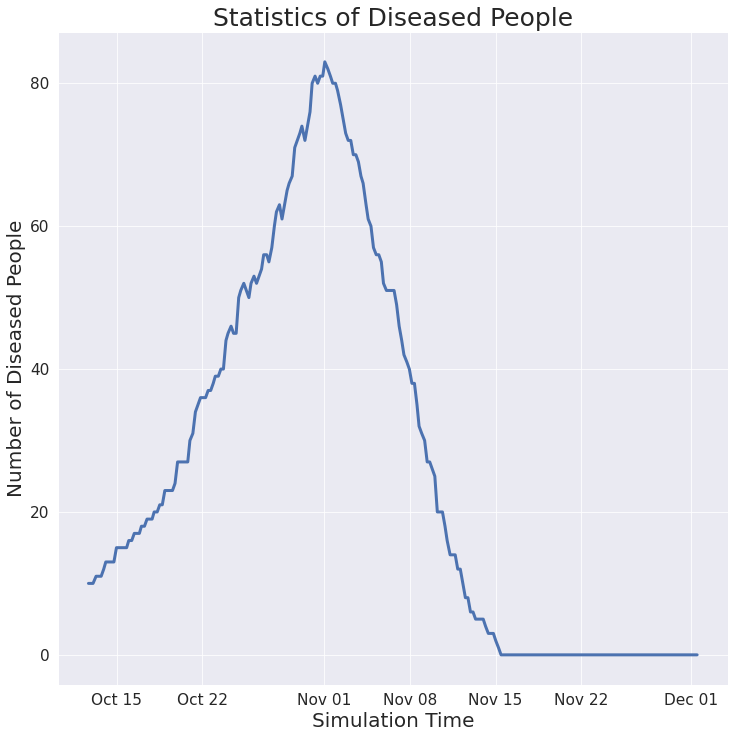

In [16]:
observers[0].plot_disease_statistics_during_time(Health_Condition.IS_INFECTED)

## Simulate with Quarantine Diseased People
Now we start quarantine only infected people at some point, and the results should be the same.

In [18]:
# Import Parser
from json_handle import Parser
parser = Parser('test')

# Load Simulator from JSON file
simulator = parser.parse_simulator()
simulator.generate_model()

# Load Simulator Data from JSON file
end_time, spread_period, initialized_infected_ids, _, observers = parser.parse_simulator_data()

# Build a policy
from datetime import timedelta
from commands import Quarantine_Diseased_People
from conditions import Time_Point_Condition

commands = [Quarantine_Diseased_People(condition=Time_Point_Condition(Time(timedelta(days=15))))]

simulator.simulate(end_time
                    , spread_period
                    , initialized_infected_ids
                    , commands
                    , observers)


INFO - population_generator.py - 1295 - __init__ - 2020-12-04 14:27:55,378 - Population Generator created
INFO - disease_manipulator.py - 61 - __init__ - 2020-12-04 14:27:55,384 - Disease Properties generated
INFO - population_generator.py - 1328 - generate_population - 2020-12-04 14:27:55,732 - Jobs required to generate the model: 1

INFO - time_simulator.py - 195 - generate_model - 2020-12-04 14:27:59,464 - Simulation model generated
INFO - time_simulator.py - 336 - simulate - 2020-12-04 14:27:59,468 - Initializing the simulation
INFO - time_simulator.py - 343 - simulate - 2020-12-04 14:27:59,496 - Starting the simulation
INFO - commands.py - 915 - take_action - 2020-12-04 14:28:08,374 - Command executed: Quarantine_Diseased_People

INFO - time_simulator.py - 365 - simulate - 2020-12-04 14:28:22,837 - Simulation completed
INFO - utils.py - 303 - show_people_statistics - 2020-12-04 14:28:22,838 - 
+----------------------------+-------+
|           People           | Count |
+=========

### Check the Result
Now, we plot the infected people statistics, it most be the same as the last section.

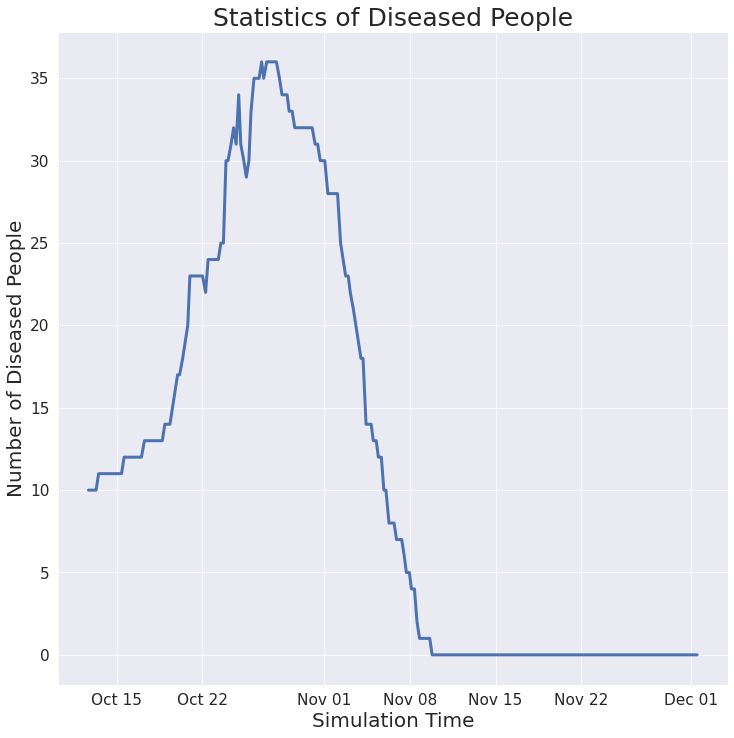

In [19]:
from utils import Health_Condition
observers[0].plot_disease_statistics_during_time(Health_Condition.IS_INFECTED)

## Simulate with a lower Infectious Rate
Here, we set infectious rate to a very low amount and check the test result.

In [21]:
# Import Parser (default constructor is the 'test' folder)
from json_handle import Parser
parser = Parser('test')

# Load Simulator from JSON file
simulator = parser.parse_simulator()

# Change the infectious rate here (or just change in the respective JSON file and then parse the simulator)
from distributions import Uniform_Disease_Property_Distribution
simulator.disease_properties.infectious_rate_distribution = \
    Uniform_Disease_Property_Distribution(parameters_dict={"upper_bound":0.2, "lower_bound":0.1})

# Generate the simulation model
simulator.generate_model()

# Load Simulator Data from JSON file
end_time, spread_period, initialized_infected_ids, _, observers = parser.parse_simulator_data()

# No policy is required
commands = []

simulator.simulate(end_time
                    , spread_period
                    , initialized_infected_ids
                    , commands
                    , observers)

INFO - population_generator.py - 1295 - __init__ - 2020-12-04 14:30:13,607 - Population Generator created
INFO - disease_manipulator.py - 61 - __init__ - 2020-12-04 14:30:13,617 - Disease Properties generated
INFO - population_generator.py - 1328 - generate_population - 2020-12-04 14:30:13,881 - Jobs required to generate the model: 1

INFO - time_simulator.py - 195 - generate_model - 2020-12-04 14:30:17,505 - Simulation model generated
INFO - time_simulator.py - 336 - simulate - 2020-12-04 14:30:17,510 - Initializing the simulation
INFO - time_simulator.py - 343 - simulate - 2020-12-04 14:30:17,532 - Starting the simulation

INFO - time_simulator.py - 365 - simulate - 2020-12-04 14:30:42,831 - Simulation completed
INFO - utils.py - 303 - show_people_statistics - 2020-12-04 14:30:42,833 - 
+----------------------------+-------+
|           People           | Count |
+============================+=======+
| Population Size            | 500   |
+----------------------------+-------+
| Con

### Plot the results
The infected people are plotted over time. We compare this with another simulation, with higher infectious rates.

In [22]:
from utils import Health_Condition
data_1 = observers[0].get_disease_statistics_during_time(Health_Condition.IS_INFECTED)

### Increase Infectious Rate

In [23]:
# Load Simulator from JSON file
simulator = parser.parse_simulator()

# Change the infectious rate here (or just change in the respective JSON file and then parse the simulator)
from distributions import Uniform_Disease_Property_Distribution
simulator.disease_properties.infectious_rate_distribution = \
    Uniform_Disease_Property_Distribution(parameters_dict={"upper_bound":0.95, "lower_bound":0.9})

# Generate the simulation model
simulator.generate_model()

# Load Simulator Data from JSON file
end_time, spread_period, initialized_infected_ids, _, observers = parser.parse_simulator_data()

# No policy is required
commands = []

simulator.simulate(end_time
                    , spread_period
                    , initialized_infected_ids
                    , commands
                    , observers)

INFO - population_generator.py - 1295 - __init__ - 2020-12-04 14:34:02,864 - Population Generator created
INFO - disease_manipulator.py - 61 - __init__ - 2020-12-04 14:34:02,870 - Disease Properties generated
INFO - population_generator.py - 1328 - generate_population - 2020-12-04 14:34:03,274 - Jobs required to generate the model: 1

INFO - time_simulator.py - 195 - generate_model - 2020-12-04 14:34:06,690 - Simulation model generated
INFO - time_simulator.py - 336 - simulate - 2020-12-04 14:34:06,695 - Initializing the simulation
INFO - time_simulator.py - 343 - simulate - 2020-12-04 14:34:06,720 - Starting the simulation

INFO - time_simulator.py - 365 - simulate - 2020-12-04 14:34:37,332 - Simulation completed
INFO - utils.py - 303 - show_people_statistics - 2020-12-04 14:34:37,335 - 
+----------------------------+-------+
|           People           | Count |
+============================+=======+
| Population Size            | 500   |
+----------------------------+-------+
| Con

### Plot and Compare
The results of low infectious rate simulation are shown in the following figure. A significant displacement in the peak of the


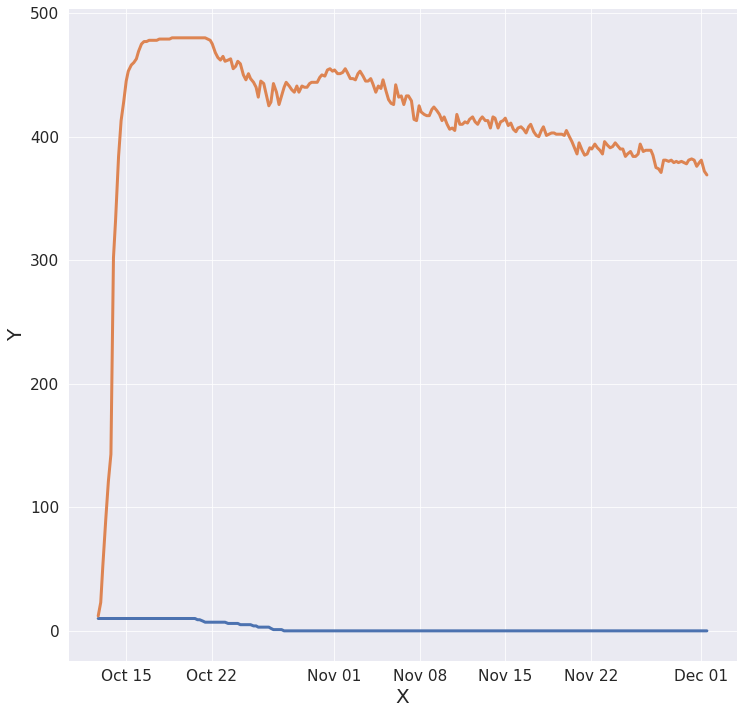

<module 'matplotlib.pyplot' from '/home/amin/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [25]:
from utils import Health_Condition
data_2 = observers[0].get_disease_statistics_during_time(Health_Condition.IS_INFECTED)

from plot_utils import Plot
Plot.plot_multiple_lines(data_1[1], [data_1[0], data_2[0]])

## Decrease Immunity
In this section, the immunity is decreased, and the results of the simulation are shown in the following figure. With this amount of immunity, almost every person should get infected. Also, the pandemic curve will not become flat since there is a small generated immunity after catching the infectious disease for the first time.

In [32]:
# Import Parser
from json_handle import Parser
parser = Parser('test')

# Load Simulator from JSON file
simulator = parser.parse_simulator()

# Change the infectious rate here (or just change in the respective JSON file and then parse the simulator)
from distributions import Uniform_Disease_Property_Distribution
simulator.disease_properties.immunity_distribution = \
    Uniform_Disease_Property_Distribution(parameters_dict={"upper_bound":0.03, "lower_bound":0.02})

# Generate the simulation model
simulator.generate_model()

# Load Simulator Data from JSON file
end_time, spread_period, initialized_infected_ids, _, observers = parser.parse_simulator_data()

# No policy is required
commands = []

simulator.simulate(end_time
                    , spread_period
                    , initialized_infected_ids
                    , commands
                    , observers)

INFO - population_generator.py - 1295 - __init__ - 2020-12-04 17:21:49,932 - Population Generator created
INFO - disease_manipulator.py - 61 - __init__ - 2020-12-04 17:21:49,935 - Disease Properties generated
INFO - population_generator.py - 1328 - generate_population - 2020-12-04 17:21:50,111 - Jobs required to generate the model: 1

INFO - time_simulator.py - 195 - generate_model - 2020-12-04 17:21:54,009 - Simulation model generated
INFO - time_simulator.py - 336 - simulate - 2020-12-04 17:21:54,035 - Initializing the simulation
INFO - time_simulator.py - 343 - simulate - 2020-12-04 17:21:54,055 - Starting the simulation

INFO - time_simulator.py - 365 - simulate - 2020-12-04 17:22:23,519 - Simulation completed
INFO - utils.py - 303 - show_people_statistics - 2020-12-04 17:22:23,521 - 
+----------------------------+-------+
|           People           | Count |
+============================+=======+
| Population Size            | 500   |
+----------------------------+-------+
| Con

### Plot the results

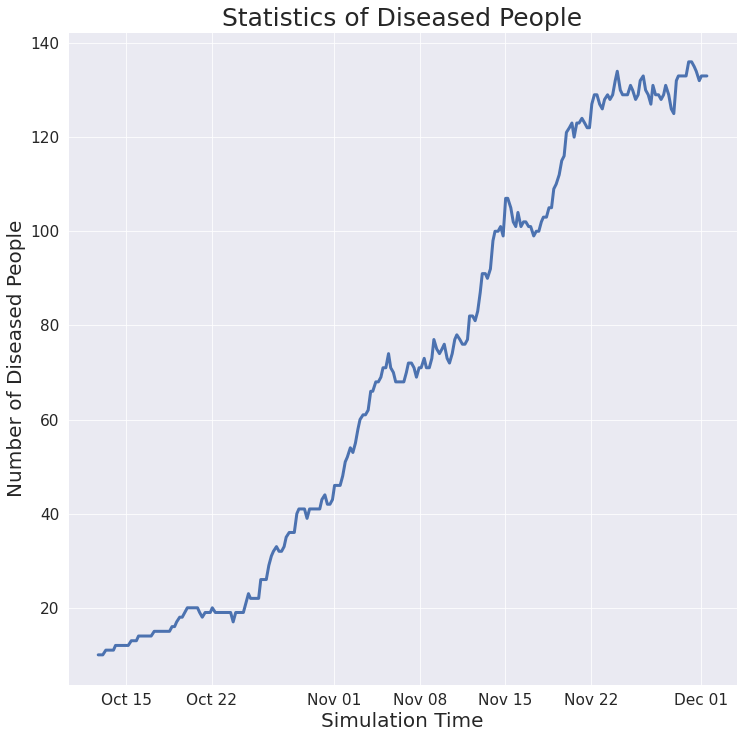

In [33]:
from utils import Health_Condition
observers[0].plot_disease_statistics_during_time(Health_Condition.IS_INFECTED)

## Quarantine All the Families
This should have the same effect as quarantining all the people.

In [29]:
# Import Parser
from json_handle import Parser
parser = Parser('test')

# Load Simulator from JSON file
simulator = parser.parse_simulator()
simulator.generate_model(is_parallel=False)

# Load Simulator Data from JSON file
end_time, spread_period, initialized_infected_ids, _, observers = parser.parse_simulator_data()

# Build a policy
from datetime import timedelta
from commands import Quarantine_Multiple_Families
from conditions import Time_Point_Condition

commands = [Quarantine_Multiple_Families(condition=Time_Point_Condition(Time(timedelta(days=15))), ids=[i for i in range(len(simulator.families))])]

simulator.simulate(end_time
                    , spread_period
                    , initialized_infected_ids
                    , commands
                    , observers)


INFO - population_generator.py - 1295 - __init__ - 2020-12-04 14:36:32,620 - Population Generator created
INFO - disease_manipulator.py - 61 - __init__ - 2020-12-04 14:36:32,622 - Disease Properties generated
INFO - population_generator.py - 1328 - generate_population - 2020-12-04 14:36:32,809 - Jobs required to generate the model: 1

INFO - time_simulator.py - 195 - generate_model - 2020-12-04 14:36:36,354 - Simulation model generated
INFO - time_simulator.py - 336 - simulate - 2020-12-04 14:36:36,357 - Initializing the simulation
INFO - time_simulator.py - 343 - simulate - 2020-12-04 14:36:36,385 - Starting the simulation
INFO - commands.py - 450 - take_action - 2020-12-04 14:36:45,230 - Command executed: Quarantine_Multiple_Families

INFO - time_simulator.py - 365 - simulate - 2020-12-04 14:36:58,569 - Simulation completed
INFO - utils.py - 303 - show_people_statistics - 2020-12-04 14:36:58,570 - 
+----------------------------+-------+
|           People           | Count |
+=======

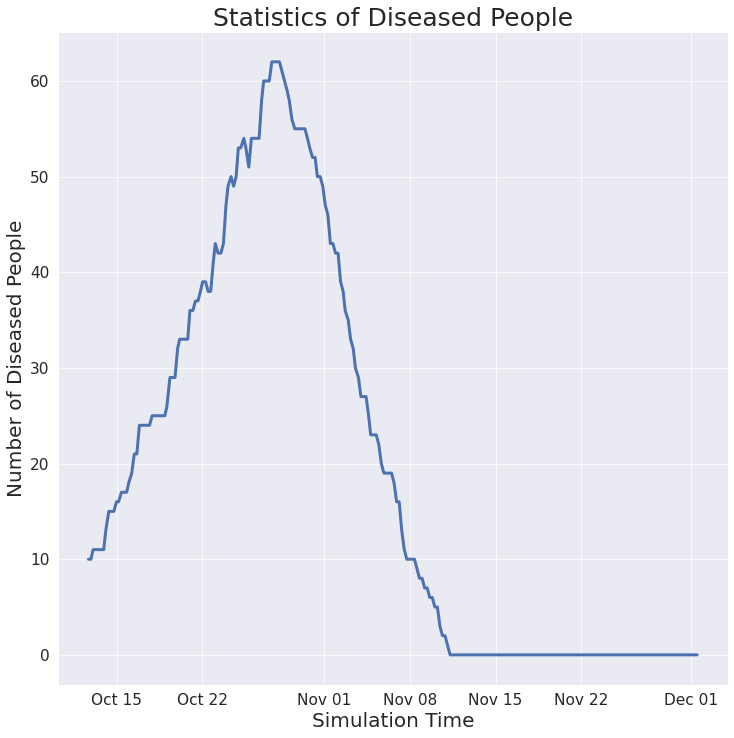

In [30]:
from utils import Health_Condition
observers[0].plot_disease_statistics_during_time(Health_Condition.IS_INFECTED)